In [53]:
import os
import numpy as np
import SimpleITK as sitk
import sys
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

from collections import Counter
import h5py

from sklearn.model_selection import StratifiedKFold

# Import data

In [13]:
# Find directory of all files
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir)
wdpath = os.path.join(cwd, 'Data\\train_')
reader = sitk.ImageSeriesReader()

count = 0
path_nbr = os.listdir(wdpath)

file_list = []
file_dict = {}
for dir_ in path_nbr:
    dir_to_exp = os.path.join(wdpath, dir_)
    for dirpath, subdirs, files in os.walk(dir_to_exp):
        if files:
            file_list.append((dirpath, files, dir_))
            file_dict[dirpath] = files

print(len(path_nbr))
print(len(file_dict))

913
1740


# Import labels

In [16]:
# Look at the labels of the images
excel_labels_path = os.path.join(cwd, 'Data\\train.csv')
print(excel_labels_path)
df = pd.read_csv(excel_labels_path)
df

C:\Users\Killian\Jupyter\UNIFESP_body_part_classification\Data\train.csv


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920...,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933...,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885...,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311...,2


# Match dir and labels

In [66]:
# Match directories to labels
dir_unique_label_list = []
dir_multi_label_list = []
all_label_list = []
for (dirpath, files, dir_) in file_list:
    for file in files:
        file_name = file[:-6]
        label = df['Target'].loc[df['SOPInstanceUID'] == file_name]
        labels = list(label.values)[0]
        labels = labels.split(' ')
        labels = [int(lab) for lab in labels if lab != '']
        img_path = dirpath + '\\' + file
        
        if len(labels) == 1:
            dir_unique_label_list.append([dir_, labels, img_path])
        else:
            dir_multi_label_list.append([dir_, labels, img_path])
        all_label_list.append([dir_, labels, img_path])
#         print(file)
#         print(dirpath)
#         print(dir_)
#         print(labels)
#         print(img_path)

print(len(dir_unique_label_list))
print(len(dir_multi_label_list))
print(len(all_label_list))
print(dir_multi_label_list[0])

1608
132
1740
['1005', [9, 21], 'C:\\Users\\Killian\\Jupyter\\UNIFESP_body_part_classification\\Data\\train_\\1005\\1.2.826.0.1.3680043.8.498.61746690124118892528305417421864320307\\1.2.826.0.1.3680043.8.498.21605553573167556338806385057474412247\\1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925-c.dcm']


# Distribution of unique labels

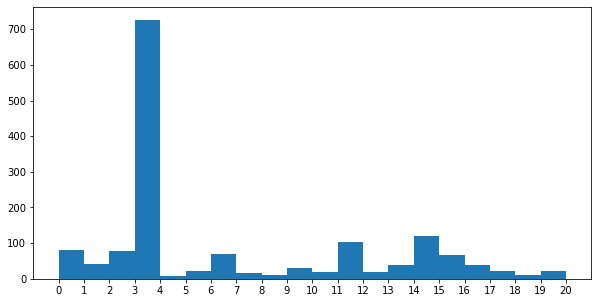

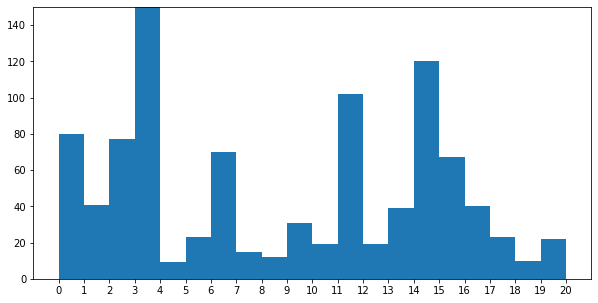

In [49]:
labels = [list_[1] for list_ in dir_unique_label_list]
labels = list(map(int, chain.from_iterable(labels)))
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0, 150)
plt.show()

# Distribution of multilabels

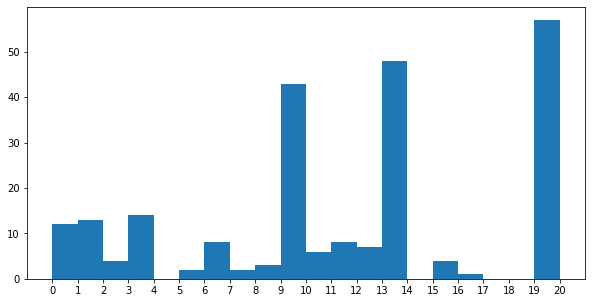

In [50]:
labels = [list_[1] for list_ in dir_multi_label_list]
labels = list(map(int, chain.from_iterable(labels)))
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()


# Save data paths/labels as hdf5

In [97]:
df = pd.DataFrame(all_label_list, columns=['nbr', 'label', 'dir'])
labels = list(dir_unique_label_df.label)
directory = list(dir_unique_label_df.dir)
saving_path = cwd + '\Data'


Folder = h5py.File(saving_path + "/data.hdf5", "w")
directory = [dir_.encode("utf-8") for dir_ in directory]

directories = Folder.create_dataset("Directories", data=np.asarray(directory))
labels = Folder.create_dataset("Labels",  data=np.asarray(labels).astype('bytes'))
Folder.close()
# patient_train = Folder.create_dataset("Test_patients",  data=np.asarray(test_patient_enc))


In [96]:
Folder.close()